In [1]:
from colomoto.minibn import *

In [2]:
f = BooleanNetwork({
    "x1": "x3 & (!x1 | !x2)",
    "x2": "x1 & x3",
    "x3": "x1 | x2 | x3",
})
f

x1 <- x3&(!x1|!x2)
x2 <- x1&x3
x3 <- x1|x2|x3

# computing graph layout...


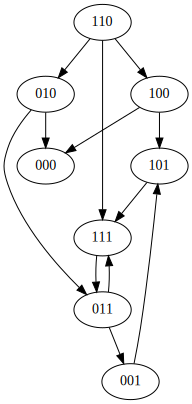

In [3]:
dyn = FullyAsynchronousDynamics(f)
g = dyn.dynamics()
g

## Graph algorithms on the transition graph

**TODO** networkx graph algorihms

In [4]:
import networkx as nx

In [5]:
list(nx.strongly_connected_components(g))

[{'000'}, {'001', '011', '101', '111'}, {'100'}, {'010'}, {'110'}]

In [6]:
limit_sets = list(nx.attracting_components(g))
limit_sets

[{'000'}, {'001', '011', '101', '111'}]

In [7]:
from functools import reduce

In [8]:
limit_configurations = reduce(set.union, limit_sets)
limit_configurations

{'000', '001', '011', '101', '111'}

## Random walks

In [9]:
list(dyn.random_walk({"x1": 1, "x2": 1, "x3": 0}, steps=5))

[{'x1': 1, 'x2': 1, 'x3': 0},
 {'x1': 1, 'x2': 0, 'x3': 0},
 {'x1': 1, 'x2': 0, 'x3': 1},
 {'x1': 1, 'x2': 1, 'x3': 1},
 {'x1': 0, 'x2': 1, 'x3': 1},
 {'x1': 1, 'x2': 1, 'x3': 1}]

## Exporting the transition graph
**TODO** export graph

In [10]:
# TODO: export to file

In [11]:
def export_edges(g):
    for x,y in g.edges():
        if x == y:
            side = "right" if x[-1] == "1" else "left"
            print(f"\t\\draw[->] (n{x}) edge[loop {side},distance=4mm] (n{y});")
        else:
            print(f"\t\\draw[->] (n{x}) edge (n{y});")

In [13]:
export_edges(g)

	\draw[->] (n100) edge (n000);
	\draw[->] (n100) edge (n101);
	\draw[->] (n101) edge (n111);
	\draw[->] (n110) edge (n010);
	\draw[->] (n110) edge (n100);
	\draw[->] (n110) edge (n111);
	\draw[->] (n010) edge (n000);
	\draw[->] (n010) edge (n011);
	\draw[->] (n111) edge (n011);
	\draw[->] (n011) edge (n111);
	\draw[->] (n011) edge (n001);
	\draw[->] (n001) edge (n101);
